$$ \mu = {C_1T^{C_2} \over {1 + C_3/T + C_4/T^2}}$$

In [189]:
C1HF = 4.5101E-14
C2HF = 3.0005
C3HF = -521.83
C4HF = 76111

Tmin = 285.5
Tmax = 472.68


Ts = range(472, 286, -5)

In [178]:
viscosidade = lambda T, C1 = C1HF, C2 = C2HF, C3 = C3HF, C4 = C4HF: C1*T**C2/(1+C3/T+C4/T**2)

In [179]:
viscosidades = list(map(viscosidade, Ts))

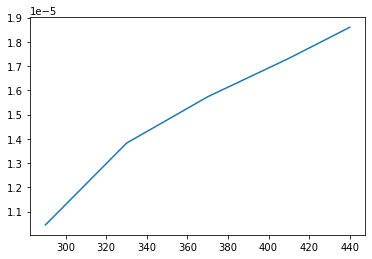

In [134]:
import matplotlib.pyplot as plt
plt.plot(Ts, viscosidades)

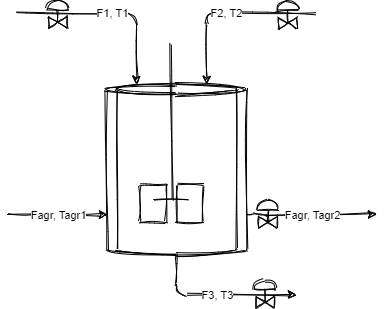

$$ {dh \over dt} = {1 \over A} \cdot {( F_1 + F_2 - F_3(t) )} $$ 

In [258]:
A = 0.1 # m²
hi = 3 # m
f1 = 1 # m/h
f2 = 2 # m³/h
f3 = lambda t: 3 - 2.72**(-2*t) # m³/h
dhdt = lambda t: 1/A * (f1 + f2 - f3(t))

In [209]:
def h(ts, hi = hi):
    dt = ts[1] - ts[0]
    for t in ts:       
        dh = dhdt(t) * dt
        hi += dh
        print(hi)

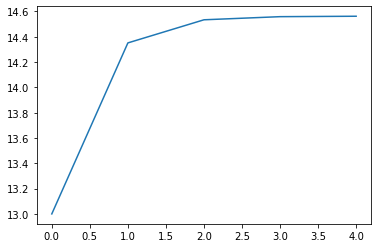

In [145]:
def h(ts, hi = hi):
    alturas = [] 
    dt = ts[1] - ts[0]
    for t in ts:       
        dh = dhdt(t) * dt
        hi += dh
        alturas.append(hi)
    return alturas

plt.plot(ts, h(ts))

In [147]:
def tempos():
    listaTempos = []
    for tempo in range(0, 18000, 100):
        listaTempos.append(tempo/3600)
    return listaTempos

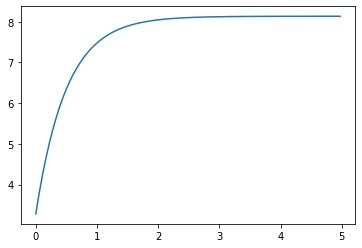

In [151]:
ts = [tempo/3600 for tempo in range(0, 18000, 100)]

plt.plot(ts, h(ts))

$$ PV = nRT $$

In [246]:
temperaturas = [300 + 3*x for x in range(1, 100)] # K
pressoes = [1e5*x for x in range(1, 100)] # Pa
n = 1 # mol
R = 8.314 # J/mol/K   

In [254]:
def calculaVolumes(temperaturas, pressoes):
    
    volumes = []
    for index in range(len(temperaturas)):
        T = temperaturas[index]
        P = pressoes[index]
        volume = n*R*T/P
        volumes.append(volume)
    
    return volumes

In [256]:
volumes = calculaVolumes(temperaturas, pressoes)

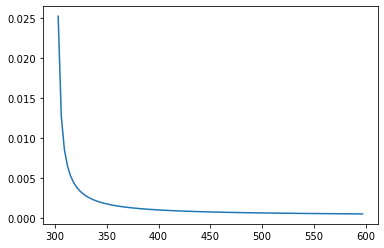

In [257]:
plt.plot(temperaturas, volumes)